# 15CSE481 - Machine Learning And Data Mining Lab
## Lab Exercises - Group 17 

Parripati Divyasri - `CB.EN.U4CSE18041`

Harish K - `CB.EN.U4CSE18501`

## Dry Beans Classification


## Preprocessing the dataset


In [18]:
import warnings
warnings.filterwarnings('ignore')

#importing necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dry_Bean.csv')
data.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,NaN,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [20]:
# feature selection
df = data.drop(labels=["ConvexArea", "EquivDiameter"], axis=1)

In [21]:
# filling null values with median
df.fillna(df.median(), inplace=True)

In [22]:
# outlier removal
classes = ['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
features = list(df.columns)[:-1]  #exclude last column

df_list = []
for cls in classes:
  df_t = df[df['Class'] == cls]
  for feature in features:
    q1 = np.percentile(df_t[feature], 25)
    q3 = np.percentile(df_t[feature], 75)
    iqr = q3 - q1
    cutoff = 1.5 * iqr
    df_t = df_t[(df_t[feature] > q1-cutoff) & (df_t[feature] < q3+cutoff)]
  df_list.append(df_t)

df = pd.concat(df_list) # changing the previous dataframe with outliers to one witout outliers

In [23]:
# normalization
X = df.drop("Class",axis=1)
y = df[["Class"]]

X = StandardScaler().fit_transform(X)
df = pd.DataFrame(X, columns=['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'Extent', 'Solidity', 'roundness',
       'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3',
       'ShapeFactor4'])
df['Class'] = list(y["Class"])

In [24]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,-0.786883,-1.031273,-1.268170,-0.470451,-1.694993,-2.618884,0.504769,0.478878,1.178359,2.053379,0.425412,2.457645,2.173262,1.124845,SEKER
1,-0.778651,-1.055656,-1.263055,-0.442982,-1.717509,-2.693946,0.401473,0.436716,1.590047,2.082455,0.388611,2.467028,2.206853,0.844523,SEKER
2,-0.772957,-1.027737,-1.256753,-0.433581,-1.716434,-2.690314,0.419622,0.162055,1.362241,2.085407,0.370403,2.455550,2.210266,1.035894,SEKER
3,-0.767846,-1.045307,-1.213438,-0.484168,-1.572602,-2.243170,0.669706,0.862346,1.646143,1.861122,0.447907,2.210966,1.952762,1.069914,SEKER
4,-0.764999,-1.003897,-1.256449,-0.404865,-1.749193,-2.803097,0.404020,0.150070,1.220955,2.141421,0.324186,2.494186,2.275169,1.171587,SEKER


## Lab 6 - September 29, 2021



**Exercise 6- Partition based Clustering**

1) Please read the Chapter 10.2 from the textbook and try the following implementations 

2) Extend the Algorithm for your case study dataset.  

3) Identify the optimal number of clusters using Elbow method for your case study  dataset 

### Elbow Method

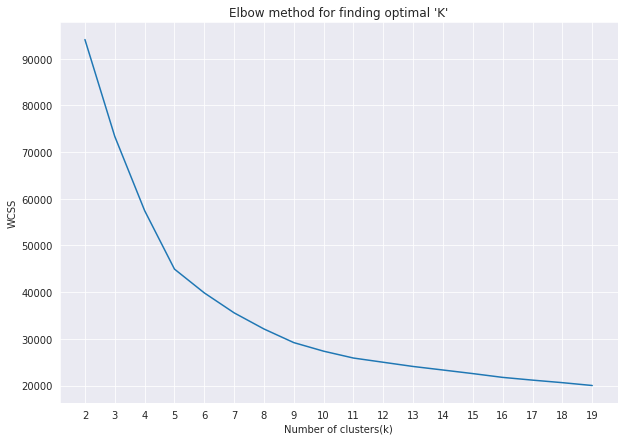

In [25]:
from sklearn.cluster import KMeans

t_df = df.drop(columns=(['Class']))

wcss=[]
for i in range(2,20):
    kmeans = KMeans(i)
    kmeans.fit(t_df)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(2,20)
plt.figure(figsize=(10,7))
plt.plot(number_clusters, wcss)
plt.title('Elbow method for finding optimal \'K\'')
plt.xlabel('Number of clusters(k)')
plt.xticks(number_clusters)
plt.ylabel('WCSS')
plt.show()

Here, we can see that the curve takes sharp turns at k=5 and k=9. Thus the optimal number of clusters is 7

### KMeans Clustering

In [37]:
kmeans = KMeans(7)
kmeans.fit(t_df)

pred_clusters = kmeans.fit_predict(t_df)

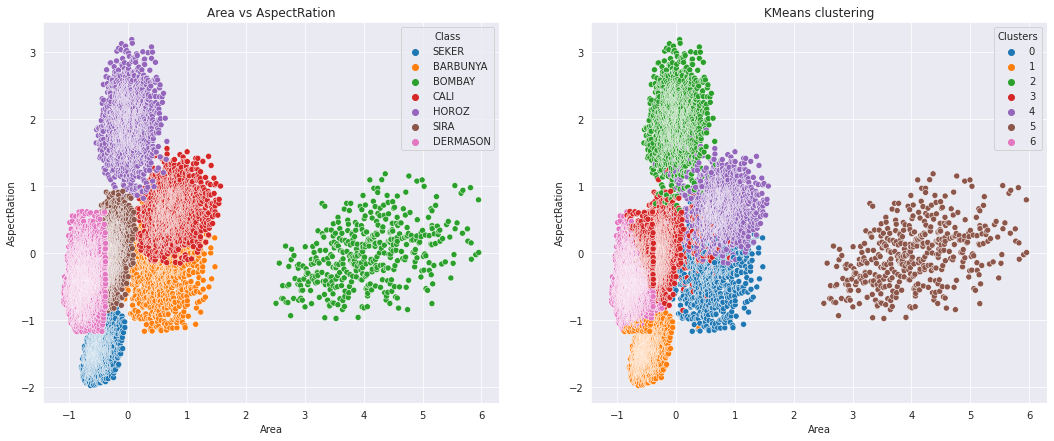

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

plot_df = t_df.copy()
plot_df['Clusters'] = pred_clusters

sns.scatterplot(ax=axs[0], x="Area", y="AspectRation", data=df, hue="Class", palette="tab10")
axs[0].set_title("Area vs AspectRation")

sns.scatterplot(ax=axs[1], x="Area",y="AspectRation",data=plot_df, hue="Clusters", palette="tab10")
axs[1].set_title("KMeans clustering")
plt.show()

## Lab 7 - October 4, 2021

**Exercise 7 - Hierarchical Clustering - Using Python and scikit-learn**

 

Please read the Chapter 10.3 ( till 10.3.2 only ) from the textbook 

a) Try the following implementations using Scipy

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ 

 

Extend the algorithm for different inter cluster dissimilarity measures like complete, average,centroid and weighted average .  Draw Dendrograms for results of  each  measures and record the results.  

 

Note: Refer  https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for different options in cluster measures. 

 

b) Try the following implementations using scikit-learn.org 

https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ 

 

Extend the algorithm for different inter cluster dissimilarity measures like  single, complete, average.  Change the affinity to Manhattan and Cosine. Draw Dendrograms for results of  each  measures and record the results.  

 

Note: Refer  https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html  for  varying the different options. 

In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

X = df.drop("Class",axis=1)

As the dataset contains many records(13,611), visualization of dendrogram takes more time. So we limit our dataset by randomly choosing 100 records of the dataset

In [50]:
X = X.sample(n = 100, replace = False)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 4289 to 7641
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             100 non-null    float64
 1   Perimeter        100 non-null    float64
 2   MajorAxisLength  100 non-null    float64
 3   MinorAxisLength  100 non-null    float64
 4   AspectRation     100 non-null    float64
 5   Eccentricity     100 non-null    float64
 6   Extent           100 non-null    float64
 7   Solidity         100 non-null    float64
 8   roundness        100 non-null    float64
 9   Compactness      100 non-null    float64
 10  ShapeFactor1     100 non-null    float64
 11  ShapeFactor2     100 non-null    float64
 12  ShapeFactor3     100 non-null    float64
 13  ShapeFactor4     100 non-null    float64
dtypes: float64(14)
memory usage: 11.7 KB


##### Function for plotting dendrogram

In [51]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
        
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

### Single Linkage Clustering 

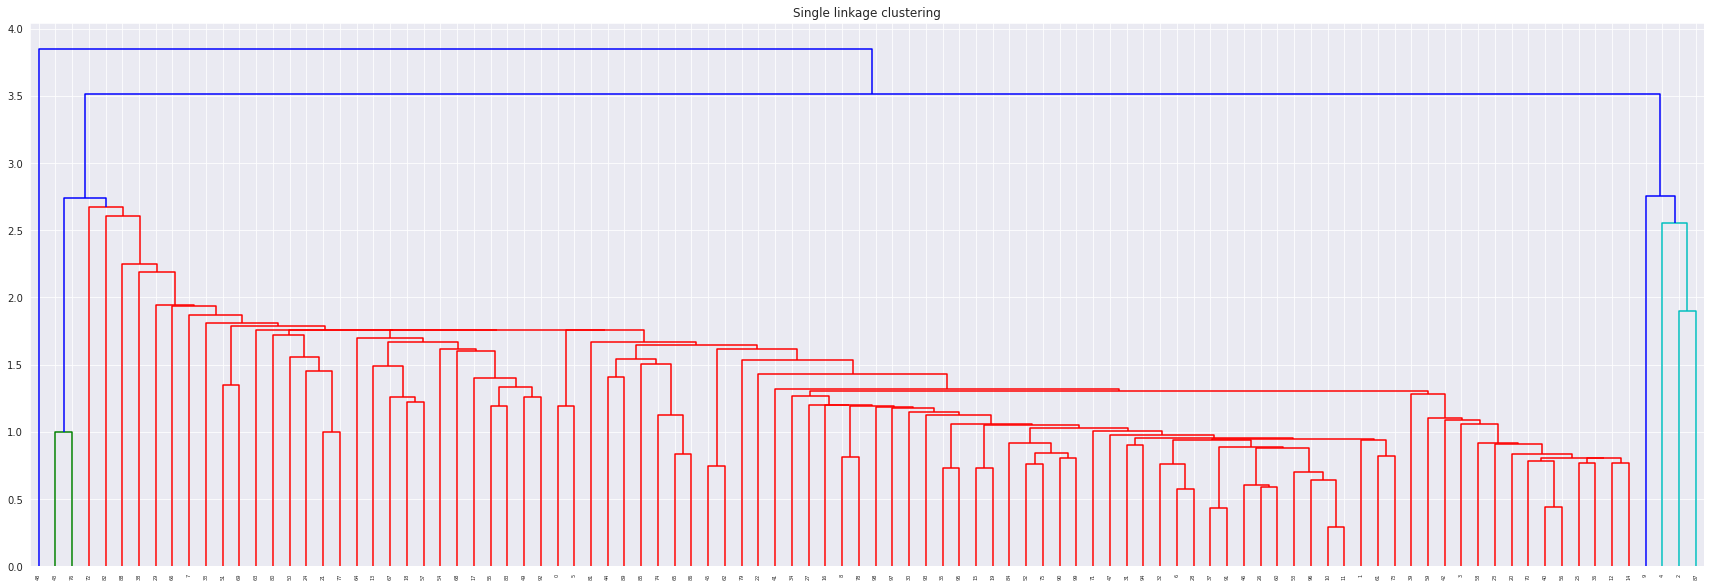

In [54]:
cluster = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters=None)
cluster = cluster.fit(X)

plt.figure(figsize=(30, 10))
plt.title('Single linkage clustering')
plot_dendrogram(cluster)
plt.show()

### Complete Linkage Clustering

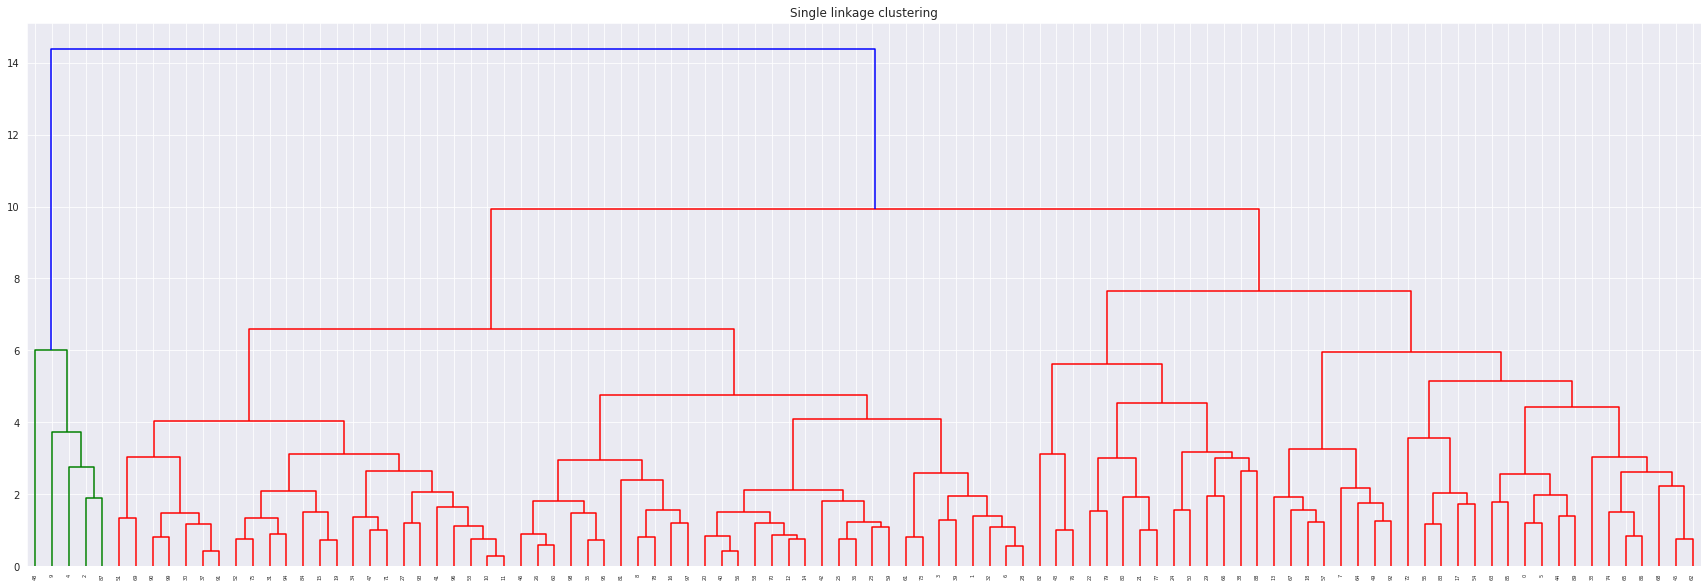

In [55]:
cluster = AgglomerativeClustering(linkage='complete', distance_threshold=0, n_clusters=None)
cluster = cluster.fit(X)

plt.figure(figsize=(30, 10))
plt.title('Complete linkage clustering')
plot_dendrogram(cluster)
plt.show()

### Complete Linkage with affinity="manhattan"

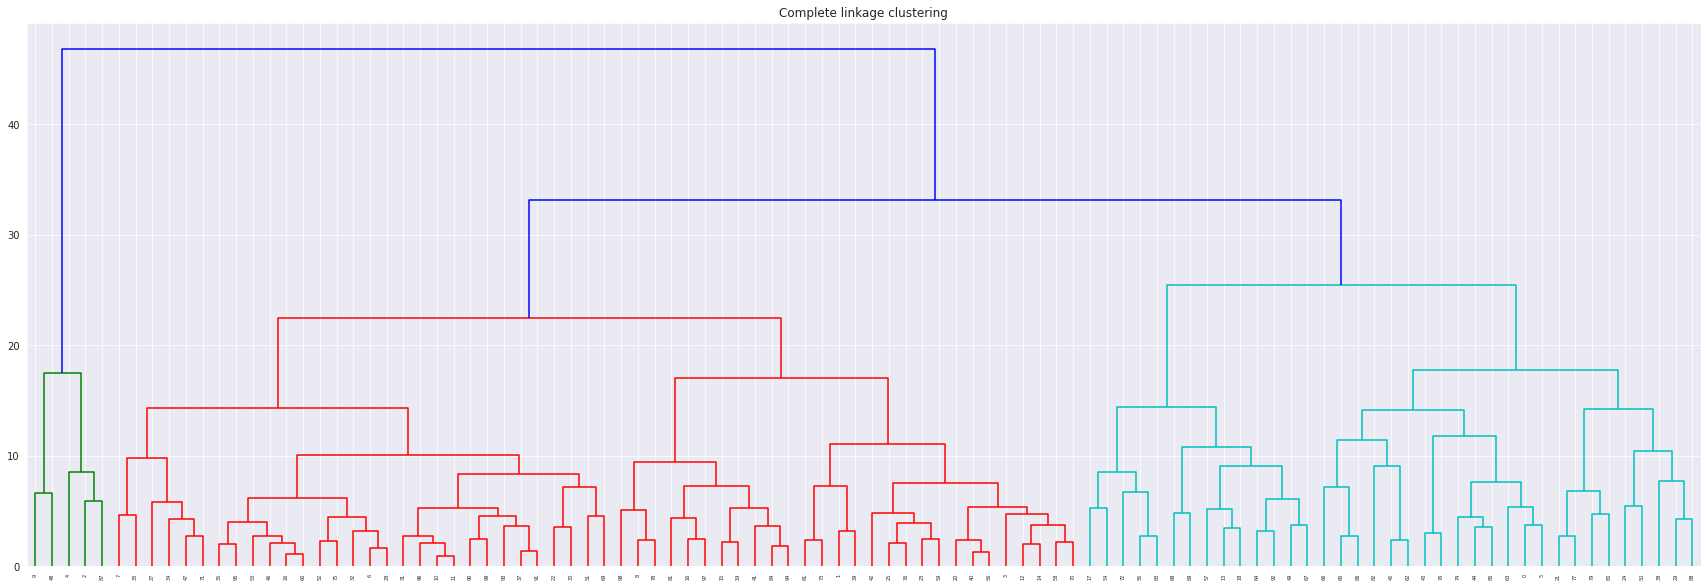

In [56]:
cluster = AgglomerativeClustering(affinity="manhattan", linkage='complete', distance_threshold=0, n_clusters=None)
cluster = cluster.fit(X)

plt.figure(figsize=(30, 10))
plt.title('Complete linkage clustering')
plot_dendrogram(cluster)
plt.show()

### Complete Linkage with affinity="cosine"

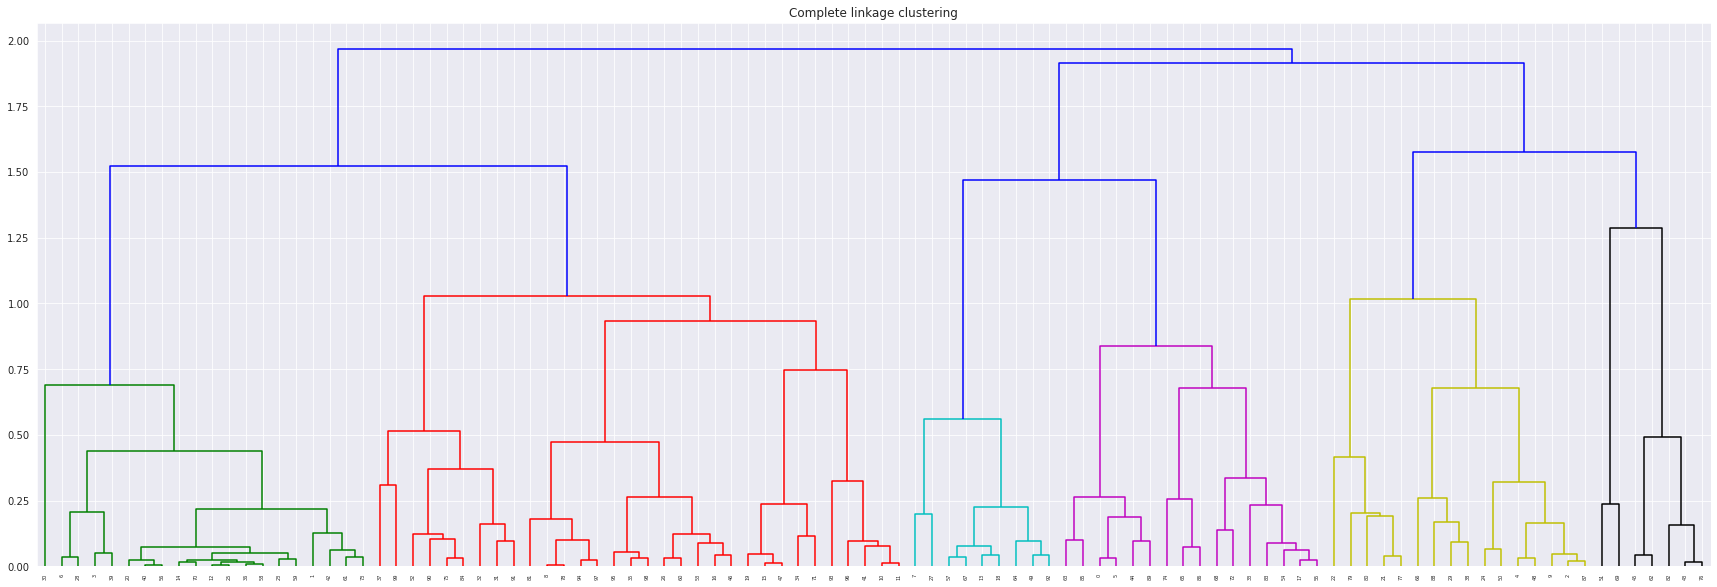

In [57]:
cluster = AgglomerativeClustering(affinity="cosine", linkage='complete', distance_threshold=0, n_clusters=None)
cluster = cluster.fit(X)

plt.figure(figsize=(30, 10))
plt.title('Complete linkage clustering')
plot_dendrogram(cluster)
plt.show()

## Lab 8 - October 18, 2021

### DBSCAN Clustering

Please read the Chapter 10.3 ( till 10.4.1 only ) from the textbook 

a) Try the following implementations using Sklearn 

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/ 

b) Extend  a)  Algorithm for your case study dataset. 

In [58]:
from sklearn.cluster import DBSCAN

In [74]:
X = df.drop("Class",axis=1).to_numpy()
clusters = DBSCAN(eps=3, min_samples=350).fit(X)

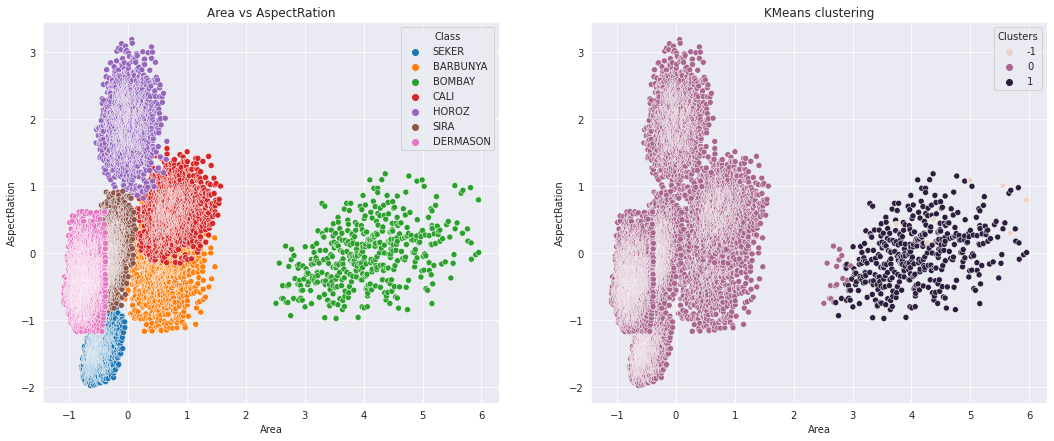

In [76]:
fig, axs = plt.subplots(1, 2, figsize=(18, 7))

plot_df = df.copy()
plot_df['Clusters'] = clusters.labels_

sns.scatterplot(ax=axs[0], x="Area", y="AspectRation", data=df, hue="Class", palette="tab10")
axs[0].set_title("Area vs AspectRation")

sns.scatterplot(ax=axs[1], x="Area",y="AspectRation",data=plot_df, hue="Clusters")
axs[1].set_title("KMeans clustering")
plt.show()

## Lab 9 - October 25, 2021

**Bagging - Using  scikit-learn**

1) Read Chapter  8.6.1 and 8.6.2 from TB  and practice the code given in the following link: 

https://www.geeksforgeeks.org/ml-bagging-classifier/  

2) Explore  the  following link for learning  about the Baggingclassifier 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 

3) Explore the following link for extending the Bagging for different problems.   

https://machinelearningmastery.com/bagging-ensemble-with-python/

In [95]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

As the dataset contains many records(13,611), bagging algorithm can consume more time. So we limit our dataset by randomly choosing 500 records of the dataset

In [86]:
bag_df = df.sample(n = 500, replace = False)
X = bag_df.drop("Class",axis=1)
y = bag_df[["Class"]]

In [87]:
seed = 8
kfold = KFold(n_splits = 3, random_state = seed)

### Bagging Classifier from Decision Trees

In [92]:
base_cls = DecisionTreeClassifier()
  
# no. of base classifier
num_trees = 500
  
# bagging classifier
model = BaggingClassifier(base_estimator = base_cls, n_estimators = num_trees, random_state = seed)

In [93]:
results = cross_val_score(model, X, y, cv = kfold)
print(results.mean())

0.9259312699901402


### Boosting

#### AdaBoost Classifier from Decision Trees

In [96]:
adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2)
results = cross_val_score(adaboost, X, y, cv = kfold)
print(results.mean())

0.5141403939109733


#### XGBoost Classification

In [97]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
results = cross_val_score(xgboost, X, y, cv = kfold)
print(results.mean())

0.9299834066806146
